# Авторизация с помощью JWT (джот)

Что из себя представляют джот токены?
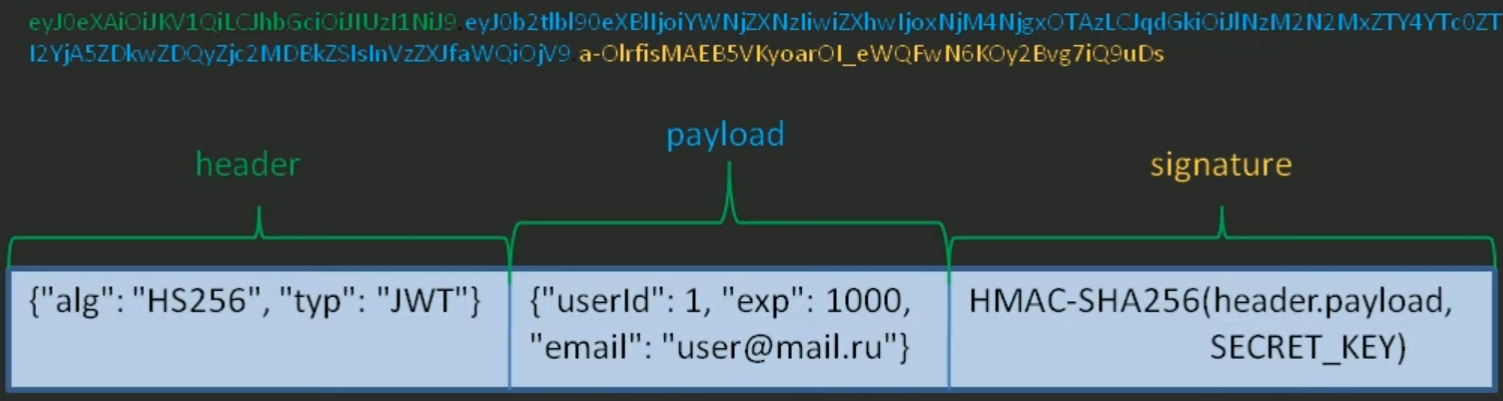

header и payload это json строки изначально которые содержут информацию и кодируются в base64
- header - алгоритм шифрования(alg) + тип токена(typ)
- payload - информация о пользователе(userid) и время жизни (exp) джот токена

данные у джот токенов не защищены от просмотра, но менять данные не получится в header payload потому что у нас есть <p style="color:red;">signature</p>

- singature - берутся закодированные header payload которые объединяются в единую строку 
далее шифруются в указанный алгоритм из header 

конечный JWT токен выглядит как header.payload.signature

# Зачем?

Новый тип токенов понадобился чтобы можно было проходить авторизацию на множестве независимых сервисов
пример - Google
нам хватит 1 раз ввести login + password и мы получаем доступ ко всем сервисам
поскольку сервисы разные, то и аутентификация тоже должна работать независимо поэтому тут используется идея джот токенов а не
обычных токенов
поскольку если бы мы использовали обычные токены, то сервис должен был бы использовать одну и ту же базу данных чтобы каждый раз
проверять присутствует токен в базе данных или нет и с каким пользователем он связан, потому что в таком случае сервисы были бы 
с дублированным функционалом
из-за этого была придумана несколько другая авторизация пользователей

В начале клиент должен пройти процедуру авторизации
Сервис, на который мы отправляем запрос авторизации перенаправляет наш запрос на сервис авторизации который работает в рамках
всего инструментария компании и если учетные данные пользователя оказались корректные, то этот сервер авторизации возвращает 
пользователю 2 токена
- access_token (сохраняется на стороне клиента)
- refresh_token (сохраняется в базе данных сервера авторизации и на стороне клиента)

для доступа к сервисам используется access_token который имеет короткое время жизни
теперь чтобы получить доступ к одному из наших сервисом достаточно указать в запросе access_token
поскольку этот токен содержит в себе всю информацию о пользователе и цифровую подпись
то сервис понимает какой пользователь запрашивает доступ и кроме того имеет возможность проверить корректность токена по его 
подписи
так как все сервисы знают секретный ключ по которому шифруется эта подпись, то есть прямая подмена данных со стороны злоумышленника
не простая задача
access_token специально живет 5 минут поскольку если бы он был неограниченное количество времени то злоумышленник
мог бы украсть данный токен и получать доступ к каждому из сервисов под нашим именем
по истечению жизни access Токена на сервер авторизации отправляется refresh_token и пользователю назначается новый 
access_token + refresh_token
в базу данных записывается новый refresh_token и в локальном защищенном хранилище тоже обновляется access_token

# Установка

Подробно про библиотеку Simple JWT и авторизацию [здесь](https://www.django-rest-framework.org/api-guide/authentication/)

В конфиг файл добавляем словарь с следующими настройками
# Django project settings.py


ACCESS_TOKEN_LIFETIME - время жизни access token (время, в течение которого пользователь может использовать токен для доступа к ресурсам).

REFRESH_TOKEN_LIFETIME - время жизни refresh token (время, в течение которого пользователь может использовать токен для обновления access token).

ROTATE_REFRESH_TOKENS - если установлено в True, то при обновлении access token будет создан новый refresh token.

BLACKLIST_AFTER_ROTATION - если установлено в True, то старый refresh token будет добавлен в черный список после создания нового refresh token.

UPDATE_LAST_LOGIN - если установлено в True, то время последнего входа пользователя будет обновляться при каждой аутентификации.

ALGORITHM - алгоритм шифрования, используемый для создания и проверки токенов.

SIGNING_KEY - ключ, используемый для создания и проверки токенов.

VERIFYING_KEY - ключ, используемый для проверки токенов (обычно используется только при использовании асимметричного шифрования).

AUDIENCE - аудитория, для которой предназначен токен.

ISSUER - издатель токена.

JSON_ENCODER - класс, используемый для сериализации данных в JSON (по умолчанию используется стандартный JSONEncoder).

JWK_URL - URL-адрес, по которому можно получить JWK (JSON Web Key) для проверки токенов.

LEEWAY - допустимое отклонение времени при проверке времени жизни токенов.

AUTH_HEADER_TYPES - типы заголовков, которые могут содержать токен.

AUTH_HEADER_NAME - название заголовка, в котором передается токен.

USER_AUTHENTICATION_RULE - правило аутентификации пользователя (обычно используется для проверки статуса аккаунта или других дополнительных условий).

AUTH_TOKEN_CLASSES - классы токенов, которые могут быть использованы для аутентификации.

TOKEN_TYPE_CLAIM - название поля в токене, которое будет содержать тип токена (обычно "access" или "refresh").

TOKEN_USER_CLASS - класс пользователя, связанный с токеном.

JTI_CLAIM - название поля в токене, которое будет содержать уникальный идентификатор токена.

SLIDING_TOKEN_REFRESH_EXP_CLAIM - название поля в токене, которое будет содержать время, после которого refresh token больше не может быть использован для обновления access token.

SLIDING_TOKEN_LIFETIME - время жизни sliding token (время, в течение которого пользователь может использовать токен для доступа к ресурсам).

SLIDING_TOKEN_REFRESH_LIFETIME - время жизни sliding refresh token (время, в течение которого пользователь может использовать токен для обновления sliding token).

TOKEN_OBTAIN_SERIALIZER - класс сериализатора для получения новой пары access/refresh token.

TOKEN_REFRESH_SERIALIZER - класс сериализатора для обновления access token по refresh token.

TOKEN_VERIFY_SERIALIZER - класс сериализатора для проверки токена.

TOKEN_BLACKLIST_SERIALIZER - класс сериализатора для добавления токена в черный список.

SLIDING_TOKEN_OBTAIN_SERIALIZER - класс сериализатора для получения новой пары sliding access/refresh token.

SLIDING_TOKEN_REFRESH_SERIALIZER - класс сериализатора для обновления sliding access token по sliding refresh token.


```python
from datetime import timedelta

SIMPLE_JWT = {
    "ACCESS_TOKEN_LIFETIME": timedelta(minutes=5),
    "REFRESH_TOKEN_LIFETIME": timedelta(days=1),
    "ROTATE_REFRESH_TOKENS": False,
    "BLACKLIST_AFTER_ROTATION": False,
    "UPDATE_LAST_LOGIN": False,

    "ALGORITHM": "HS256", 
    "SIGNING_KEY": settings.SECRET_KEY,
    "VERIFYING_KEY": "",
    "AUDIENCE": None,
    "ISSUER": None,
    "JSON_ENCODER": None,
    "JWK_URL": None,
    "LEEWAY": 0,

    "AUTH_HEADER_TYPES": ("Bearer",),
    "AUTH_HEADER_NAME": "HTTP_AUTHORIZATION",
    
    "USER_ID_FIELD": "id", 
    "USER_ID_CLAIM": "user_id",
    "USER_AUTHENTICATION_RULE": "rest_framework_simplejwt.authentication.default_user_authentication_rule",

    "AUTH_TOKEN_CLASSES": ("rest_framework_simplejwt.tokens.AccessToken",),
    "TOKEN_TYPE_CLAIM": "token_type",
    "TOKEN_USER_CLASS": "rest_framework_simplejwt.models.TokenUser",

    "JTI_CLAIM": "jti",

    "SLIDING_TOKEN_REFRESH_EXP_CLAIM": "refresh_exp",
    "SLIDING_TOKEN_LIFETIME": timedelta(minutes=5),
    "SLIDING_TOKEN_REFRESH_LIFETIME": timedelta(days=1),

    "TOKEN_OBTAIN_SERIALIZER": "rest_framework_simplejwt.serializers.TokenObtainPairSerializer",
    "TOKEN_REFRESH_SERIALIZER": "rest_framework_simplejwt.serializers.TokenRefreshSerializer",
    "TOKEN_VERIFY_SERIALIZER": "rest_framework_simplejwt.serializers.TokenVerifySerializer",
    "TOKEN_BLACKLIST_SERIALIZER": "rest_framework_simplejwt.serializers.TokenBlacklistSerializer",
    "SLIDING_TOKEN_OBTAIN_SERIALIZER": "rest_framework_simplejwt.serializers.TokenObtainSlidingSerializer",
    "SLIDING_TOKEN_REFRESH_SERIALIZER": "rest_framework_simplejwt.serializers.TokenRefreshSlidingSerializer",
}
```

# Реализация

In [138]:
import requests
import json

AUTH_HEADER_TYPES: str = 'Bearer'
ACCESS: int = 200
ACCESS_COUNTER: int = 0
    
def update_access_token(refresh_token) -> dict:
    _data = {
        "refresh": refresh_token
    }
    
    return json.loads(requests.post('http://127.0.0.1:8000/api/token/refresh/', data=_data).text)

def get_tokens() -> dict: # get access and refresh token
        
    _data = {
        'username': 'root',
        'password': 'root'
    }
    
    return json.loads(requests.post('http://127.0.0.1:8000/api/token/', data=_data).text)

# Получение токенов и применение их для получения доступа

In [139]:
print("[+] Получаем токены...")

tokens = get_tokens()
refresh_token, access_token = tokens['refresh'], tokens['access']   
headers = {
    'Content-Type': 'application/json',
    'Authorization': AUTH_HEADER_TYPES + ' ' + access_token
}

print("[+] Делаем запрос /api/v1/paper/ код", end=' ')    

response = requests.get('http://127.0.0.1:8000/api/v1/paper/', headers=headers)

print(response.status_code)

[+] Получаем токены...
[+] Делаем запрос /api/v1/paper/ код 200


# Обновление access_token после истечения времени

In [140]:
access_token = update_refresh_token(refresh_token)['access']
print(f'[+] Повторный запрос на сервер с новым access_token', end=' ')

response = response = requests.get('http://127.0.0.1:8000/api/v1/paper/', headers=headers)
print(response.status_code)

[+] Повторный запрос на сервер с новым access_token 200
